In [9]:
from rebinning import station_radii, draw_wheels, assign_colors, make_concentric_disks, make_disk, station3_boundaries, rebin
from utilities import Show2Dimg
import numpy as np
import copy

In [2]:
#hole to mask the non-relevant inner and outer parts
empty_img = np.zeros((100,100), dtype=np.int16)
inner_radius, outer_radius = station3_boundaries()
hole = make_disk(empty_img, inner_radius,1.)
hole = np.abs(hole-1)
hole *= make_disk(empty_img, outer_radius,1.)

In [3]:
slices = draw_wheels(50,3)
conc_disks = make_concentric_disks(50,station_radii(2))
regions = slices * conc_disks * hole

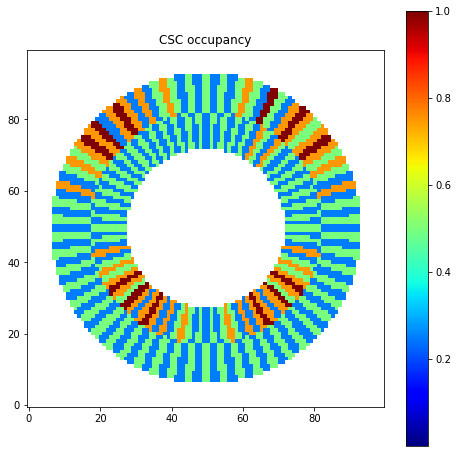

In [4]:
Show2Dimg(assign_colors(regions))

### rebin images

In [5]:
me = "hRHGlobalm3"
out_label = "240724"
data = np.load(me+'_'+out_label+'_s1.npz')
imgs = data["imgs"]

##### example

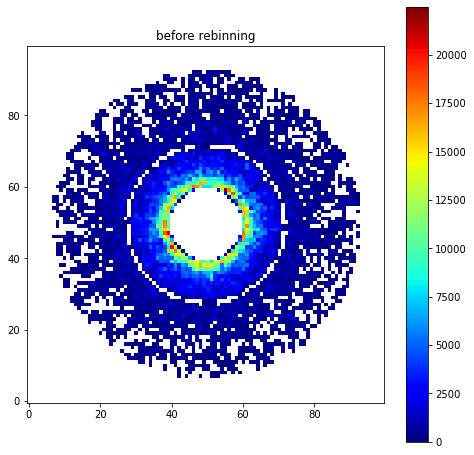

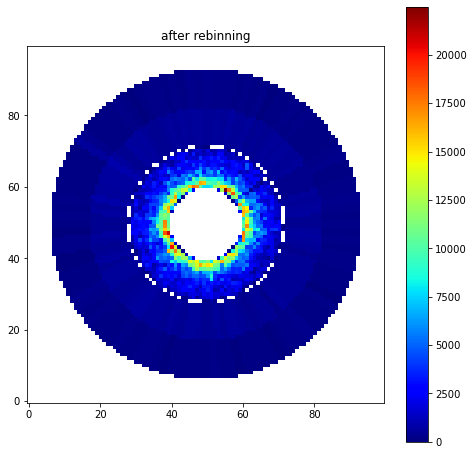

In [7]:
index = 34
Show2Dimg(imgs[34], title = "before rebinning")
Show2Dimg(rebin(regions,imgs[34]), title = "after rebinning")

#### apply to all images

In [10]:
new_imgs = np.array([rebin(regions, img) for img in imgs])
np.savez(me + '_' + out_label + 'rebinned_s1.npz', imgs=new_imgs, lumis=data["lumis"], entry=data["entry"], num=data["num"], run_min=data["run_min"], run_max=data["run_max"], lumi_min=data["lumi_min"], lumi_max=data["lumi_max"])